<div style="text-align: center;">
    <h1>RESEARCH PROJECT PART 2</h1>
</div>

<div style="text-align: center;">
    The primary goal of this Jupyter notebook is to further enhance the dataset quality by restoring the click proportions, followed by EDA, train-test splitting and feature engineering, in order to prepare the dataset for input into machine learning models.</h1>
</div>

# 1. Environment preparation

In [1]:
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
import warnings
warnings.filterwarnings("ignore")

#libraries for encoding  
import time
from timeit import default_timer as timer
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

In [2]:
#read the dataset csv file
initial_df = pd.read_csv("project_initial_file_new.csv")

# 2. Dataset Processing

In [3]:
#get an overview of the dataset 
initial_df.head()

,user,adgroup_id,nonclk,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,ad_normal_date,btag,bh_normal_date
0,358193.0,102.0,0.0,1.0,126.0,138148.0,20107.0,102457.0,98.0,7.0,2.0,2.0,2.0,2.0,3.0,0.0,1.0,2017-05-10 05:25:53,adseen,2017-05-10 05:25:53
1,358193.0,102.0,1.0,0.0,126.0,138148.0,20107.0,102457.0,98.0,7.0,2.0,2.0,2.0,2.0,3.0,0.0,1.0,2017-05-09 19:39:42,adseen,2017-05-09 19:39:42
2,358193.0,102.0,1.0,0.0,126.0,138148.0,20107.0,102457.0,98.0,7.0,2.0,2.0,2.0,2.0,3.0,0.0,1.0,2017-05-09 19:39:42,buy,2017-05-08 13:58:54
3,1002263.0,102.0,0.0,1.0,126.0,138148.0,20107.0,102457.0,98.0,19.0,3.0,2.0,3.0,2.0,3.0,0.0,2.0,2017-05-11 14:43:50,adseen,2017-05-11 14:43:50
4,1002263.0,102.0,1.0,0.0,126.0,138148.0,20107.0,102457.0,98.0,19.0,3.0,2.0,3.0,2.0,3.0,0.0,2.0,2017-05-06 05:31:03,adseen,2017-05-06 05:31:03


In [4]:
#get an overview of the dataset 
initial_df.head()

,user,adgroup_id,nonclk,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,ad_normal_date,btag,bh_normal_date
0,358193.0,102.0,0.0,1.0,126.0,138148.0,20107.0,102457.0,98.0,7.0,2.0,2.0,2.0,2.0,3.0,0.0,1.0,2017-05-10 05:25:53,adseen,2017-05-10 05:25:53
1,358193.0,102.0,1.0,0.0,126.0,138148.0,20107.0,102457.0,98.0,7.0,2.0,2.0,2.0,2.0,3.0,0.0,1.0,2017-05-09 19:39:42,adseen,2017-05-09 19:39:42
2,358193.0,102.0,1.0,0.0,126.0,138148.0,20107.0,102457.0,98.0,7.0,2.0,2.0,2.0,2.0,3.0,0.0,1.0,2017-05-09 19:39:42,buy,2017-05-08 13:58:54
3,1002263.0,102.0,0.0,1.0,126.0,138148.0,20107.0,102457.0,98.0,19.0,3.0,2.0,3.0,2.0,3.0,0.0,2.0,2017-05-11 14:43:50,adseen,2017-05-11 14:43:50
4,1002263.0,102.0,1.0,0.0,126.0,138148.0,20107.0,102457.0,98.0,19.0,3.0,2.0,3.0,2.0,3.0,0.0,2.0,2017-05-06 05:31:03,adseen,2017-05-06 05:31:03


In [5]:
#check again the count of clicks to non clicks 
initial_df['clk'].value_counts()

clk
0.0    163472
1.0    114376
Name: count, dtype: int64

In [6]:
#check again the distribution of behaviour 
initial_df['btag'].value_counts()

btag
adseen    184742
cart       55620
fav        31516
buy         5970
Name: count, dtype: int64

In [7]:
#check the frequency of each unique user in the df 
initial_df['user'].value_counts()

user
847199.0     64
758373.0     63
1054068.0    58
1114594.0    56
17686.0      55
             ..
49740.0       1
23507.0       1
968021.0      1
533829.0      1
411869.0      1
Name: count, Length: 111872, dtype: int64

The first task will be to refine the formatting of the dataset.

### 2.1. Formatting the dataset

#### 2.1.1. Renaming the dataset

In [8]:
#rename the df
df = initial_df

#### 2.1.2. Converting variables to appropriate datatypes:

This will help free up space during computation.

In [9]:
#convert float columns to int except 'price'
float_cols = df.select_dtypes(include='float64').columns
int_cols = [col for col in float_cols if col != 'price']
df[int_cols] = df[int_cols].astype('int')

#convert again date columns to datetime
df['ad_normal_date'] = pd.to_datetime(df['ad_normal_date'])
df['bh_normal_date'] = pd.to_datetime(df['bh_normal_date'])

In [10]:
df.dtypes

user                             int32
adgroup_id                       int32
nonclk                           int32
clk                              int32
cate_id                          int32
campaign_id                      int32
customer                         int32
brand                            int32
price                          float64
cms_segid                        int32
cms_group_id                     int32
final_gender_code                int32
age_level                        int32
pvalue_level                     int32
shopping_level                   int32
occupation                       int32
new_user_class_level             int32
ad_normal_date          datetime64[ns]
btag                            object
bh_normal_date          datetime64[ns]
dtype: object

#### 2.1.3. Mapping categorical variables to their categories:

Categorical variables, where each unique value is represented by a code number, will be mapped to their original meaning for ease of interpretability.

In [11]:
df['final_gender_code'].value_counts()

final_gender_code
2    203737
1     74111
Name: count, dtype: int64

A value of 1 represents male and 2 represents female, with more female users than male users.

In [12]:
df['age_level'].value_counts()

age_level
3    81469
4    66831
2    58409
5    53760
1    12005
6     5282
0       92
Name: count, dtype: int64

Although the original source did not specify the exact meaning of each age level, we can map it based on a graph from Statista showing Taobao user distribution. 
(reference: https://www.statista.com/statistics/248365/taobao-shoppers-in-chinabyage/#:~:text=Alibaba's%20e%2Dcommerce%20platform%20Taobao,were%20over%2046%20years%20old)

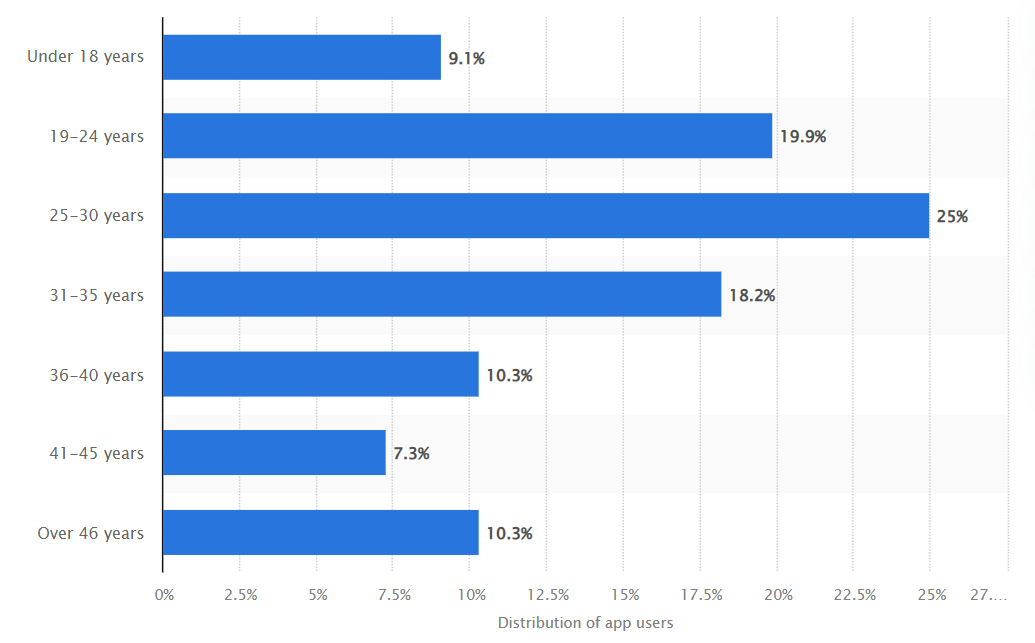

In [13]:
df['pvalue_level'].value_counts()

pvalue_level
2    169891
1     85198
3     22759
Name: count, dtype: int64

This represents the consumption level or purchasing power of users, categorised into three levels:

1: **Low Consumption** users with lower purchasing power, typically making fewer or smaller purchases.

2: **Mid Consumption** users with moderate purchasing power, making more regular purchases or mid-sized in value.

3: **High Consumption** users with high purchasing power, often making larger or more frequent purchases.

Mid consumption seems to be the most frequent user characteristic. 

In [14]:
df['shopping_level'].value_counts()

shopping_level
3    264904
2     12203
1       741
Name: count, dtype: int64

This one indicates the level of engagement or activity of users in terms of shopping habits, categorised into three levels:

1: **Shallow user** who interact less frequently with the platform, typically making fewer purchases or browsing less extensively.

2: **Moderate user** with an average level of engagement, browsing and purchasing moderately.

3: **Depth user** who are highly engaged with the platform, frequently browsing and making more extensive or regular purchases.

Depth user seems to be the most frequent user characteristic.

In [15]:
df['occupation'].value_counts()

occupation
0    256777
1     21071
Name: count, dtype: int64

This category name should be changed, as 1 represents that the user is a college student and 0 indicates they are not. It can be observed that many users are not college students.

In [16]:
df.rename(columns={'occupation': 'college_student'}, inplace=True)

In [17]:
df['new_user_class_level'].value_counts()

new_user_class_level
2    126205
3     70209
4     52719
1     28715
Name: count, dtype: int64

This refers to China's city tier classification (for more details : https://en.wikipedia.org/wiki/Chinese_city_tier_system). Although the Aliyun Taobao datset dataset does not explicitly mention which number corresponds to which tier, it is generally understood that 1 refers to tier 1, and so on. We can use the distribution from China Daily to map it out. (https://www.chinadaily.com.cn/business/2012-07/19/content_15599957.htm).

From the distribution, it is evident that value 2 (possibly equivalent to New Tier 1) is the most frequent, which is plausible if they represent rapidly developing urban centers with significant economic activity.

In [18]:
#define mappings for all categorical columns
mappings = {
    'final_gender_code': {1: "Male", 2: "Female"},
    'age_level': {0: "Under 18", 1: "19-24", 2: "25-30", 3: "31-35", 4: "36-40", 5: "41-45", 6: "Over 46"},
    'pvalue_level': {1: "Low Consumption", 2: "Mid Consumption", 3: "High Consumption"},
    'shopping_level': {1: "Shallow User", 2: "Moderate User", 3: "Depth User"},
    'college_student': {1: "Yes", 0: "No"},
    'new_user_class_level': {1: "Tier 1", 2: "New Tier 1", 3: "Tier 2", 4: "Tier 3"}
}

#apply the mappings to each column
for col, mapping in mappings.items():
    df[col] = df[col].map(mapping)

In [19]:
df.head()

,user,adgroup_id,nonclk,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,college_student,new_user_class_level,ad_normal_date,btag,bh_normal_date
0,358193,102,0,1,126,138148,20107,102457,98.0,7,2,Female,25-30,Mid Consumption,Depth User,No,Tier 1,2017-05-10 05:25:53,adseen,2017-05-10 05:25:53
1,358193,102,1,0,126,138148,20107,102457,98.0,7,2,Female,25-30,Mid Consumption,Depth User,No,Tier 1,2017-05-09 19:39:42,adseen,2017-05-09 19:39:42
2,358193,102,1,0,126,138148,20107,102457,98.0,7,2,Female,25-30,Mid Consumption,Depth User,No,Tier 1,2017-05-09 19:39:42,buy,2017-05-08 13:58:54
3,1002263,102,0,1,126,138148,20107,102457,98.0,19,3,Female,31-35,Mid Consumption,Depth User,No,New Tier 1,2017-05-11 14:43:50,adseen,2017-05-11 14:43:50
4,1002263,102,1,0,126,138148,20107,102457,98.0,19,3,Female,31-35,Mid Consumption,Depth User,No,New Tier 1,2017-05-06 05:31:03,adseen,2017-05-06 05:31:03


#### 2.1.4. Converting timezones:

Since the original timestamp was using the UTC timezone, it is more convenient for interpretability to convert it to China's timezone.

In [20]:
#localise the datetime to UTC and convert it to Shanghai
df['ad_normal_date'] = df['ad_normal_date'].dt.tz_localize('UTC')
df['ad_normal_date'] = df['ad_normal_date'].dt.tz_convert('Asia/Shanghai')

In [21]:
#localise the datetime to UTC and convert it to Shanghai
df['bh_normal_date'] = df['bh_normal_date'].dt.tz_localize('UTC')
df['bh_normal_date'] = df['bh_normal_date'].dt.tz_convert('Asia/Shanghai')

In [22]:
df.head()

,user,adgroup_id,nonclk,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,college_student,new_user_class_level,ad_normal_date,btag,bh_normal_date
0,358193,102,0,1,126,138148,20107,102457,98.0,7,2,Female,25-30,Mid Consumption,Depth User,No,Tier 1,2017-05-10 13:25:53+08:00,adseen,2017-05-10 13:25:53+08:00
1,358193,102,1,0,126,138148,20107,102457,98.0,7,2,Female,25-30,Mid Consumption,Depth User,No,Tier 1,2017-05-10 03:39:42+08:00,adseen,2017-05-10 03:39:42+08:00
2,358193,102,1,0,126,138148,20107,102457,98.0,7,2,Female,25-30,Mid Consumption,Depth User,No,Tier 1,2017-05-10 03:39:42+08:00,buy,2017-05-08 21:58:54+08:00
3,1002263,102,0,1,126,138148,20107,102457,98.0,19,3,Female,31-35,Mid Consumption,Depth User,No,New Tier 1,2017-05-11 22:43:50+08:00,adseen,2017-05-11 22:43:50+08:00
4,1002263,102,1,0,126,138148,20107,102457,98.0,19,3,Female,31-35,Mid Consumption,Depth User,No,New Tier 1,2017-05-06 13:31:03+08:00,adseen,2017-05-06 13:31:03+08:00


In [23]:
#e that the date columns are in datetime format
df['ad_normal_date'] = pd.to_datetime(df['ad_normal_date'])
df['bh_normal_date'] = pd.to_datetime(df['bh_normal_date'])

#calculate the absolute time difference and create a new column
df['time_difference'] = (df['ad_normal_date'] - df['bh_normal_date']).abs()

In [24]:
df.head()

,user,adgroup_id,nonclk,clk,cate_id,campaign_id,customer,brand,price,cms_segid,...,final_gender_code,age_level,pvalue_level,shopping_level,college_student,new_user_class_level,ad_normal_date,btag,bh_normal_date,time_difference
0,358193,102,0,1,126,138148,20107,102457,98.0,7,...,Female,25-30,Mid Consumption,Depth User,No,Tier 1,2017-05-10 13:25:53+08:00,adseen,2017-05-10 13:25:53+08:00,0 days 00:00:00
1,358193,102,1,0,126,138148,20107,102457,98.0,7,...,Female,25-30,Mid Consumption,Depth User,No,Tier 1,2017-05-10 03:39:42+08:00,adseen,2017-05-10 03:39:42+08:00,0 days 00:00:00
2,358193,102,1,0,126,138148,20107,102457,98.0,7,...,Female,25-30,Mid Consumption,Depth User,No,Tier 1,2017-05-10 03:39:42+08:00,buy,2017-05-08 21:58:54+08:00,1 days 05:40:48
3,1002263,102,0,1,126,138148,20107,102457,98.0,19,...,Female,31-35,Mid Consumption,Depth User,No,New Tier 1,2017-05-11 22:43:50+08:00,adseen,2017-05-11 22:43:50+08:00,0 days 00:00:00
4,1002263,102,1,0,126,138148,20107,102457,98.0,19,...,Female,31-35,Mid Consumption,Depth User,No,New Tier 1,2017-05-06 13:31:03+08:00,adseen,2017-05-06 13:31:03+08:00,0 days 00:00:00


#### 2.1.5. Dropping unecessary column

Since clk is going to be the target variable, there is no need to have two columns representing the same information, so the nonclk column will be dropped.

In [25]:
df = df.drop(columns=['nonclk'])

### 2.2. Restoring Target Variable Proportions

The first step will be to eliminate rare values and reduce their numbers as they introduce more noise to models.

In [26]:
#rename the dataset
filtered_df = df

In [27]:
#check again its original shape
filtered_df.shape

(277848, 20)

While downsizing, the goal is to restore the original proportion of 95% non-clicks to 5% clicks, or at least get closer to it. Also, it is important to ensure that no unique users have fewer than a certain set of occurrences (The final parameters were determined through experimentation to find the closest sample that fulfills the desired conditions), preserving meaningful information regarding each user's behaviour.

In [28]:
#separate clk == 0
clk_0_df = filtered_df[filtered_df['clk'] == 0]

#separate clk == 1
clk_1_df = filtered_df[filtered_df['clk'] == 1]

#check the shape of each df
print(f"Shape of clk == 0 DataFrame: {clk_0_df.shape}")
print(f"Shape of clk == 1 DataFrame: {clk_1_df.shape}")

Shape of clk == 0 DataFrame: (163472, 20)
Shape of clk == 1 DataFrame: (114376, 20)


In [29]:
#count occurrences of each user
user_counts = clk_0_df['adgroup_id'].value_counts()

#identify users with 10 or more occurrences
users_to_keep = user_counts[user_counts >= 5].index

#filter the df to keep only these users
clk_0_df = clk_0_df[clk_0_df['adgroup_id'].isin(users_to_keep)]

clk_0_df.shape

(105835, 20)

In [30]:
#count occurrences of each user
user_counts = clk_1_df['adgroup_id'].value_counts()

#identify users with 10 or more occurrences
users_to_keep = user_counts[user_counts >= 50].index

#filter the DataFrame to keep only these users
clk_1_df = clk_1_df[clk_1_df['adgroup_id'].isin(users_to_keep)]

clk_1_df.shape

(7257, 20)

In [31]:
clk_0_df.head()

,user,adgroup_id,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,college_student,new_user_class_level,ad_normal_date,btag,bh_normal_date,time_difference
1,358193,102,0,126,138148,20107,102457,98.0,7,2,Female,25-30,Mid Consumption,Depth User,No,Tier 1,2017-05-10 03:39:42+08:00,adseen,2017-05-10 03:39:42+08:00,0 days 00:00:00
2,358193,102,0,126,138148,20107,102457,98.0,7,2,Female,25-30,Mid Consumption,Depth User,No,Tier 1,2017-05-10 03:39:42+08:00,buy,2017-05-08 21:58:54+08:00,1 days 05:40:48
4,1002263,102,0,126,138148,20107,102457,98.0,19,3,Female,31-35,Mid Consumption,Depth User,No,New Tier 1,2017-05-06 13:31:03+08:00,adseen,2017-05-06 13:31:03+08:00,0 days 00:00:00
5,1002263,102,0,126,138148,20107,102457,98.0,19,3,Female,31-35,Mid Consumption,Depth User,No,New Tier 1,2017-05-06 13:31:03+08:00,cart,2017-05-06 10:50:14+08:00,0 days 02:40:49
6,1002263,102,0,126,138148,20107,102457,98.0,19,3,Female,31-35,Mid Consumption,Depth User,No,New Tier 1,2017-05-06 13:31:03+08:00,fav,2017-05-07 11:15:56+08:00,0 days 21:44:53


In [32]:
clk_1_df.head()

,user,adgroup_id,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,college_student,new_user_class_level,ad_normal_date,btag,bh_normal_date,time_difference
10949,495077,118317,1,4505,28666,43060,18557,198.0,2,1,Female,19-24,Mid Consumption,Depth User,No,New Tier 1,2017-05-10 12:25:47+08:00,adseen,2017-05-10 12:25:47+08:00,0 days
10951,845146,118317,1,4505,28666,43060,18557,198.0,7,2,Female,25-30,Low Consumption,Depth User,No,Tier 1,2017-05-09 10:10:48+08:00,adseen,2017-05-09 10:10:48+08:00,0 days
10953,498362,118317,1,4505,28666,43060,18557,198.0,7,2,Female,25-30,Low Consumption,Depth User,No,New Tier 1,2017-05-06 22:54:18+08:00,adseen,2017-05-06 22:54:18+08:00,0 days
10955,189265,118317,1,4505,28666,43060,18557,198.0,2,1,Female,19-24,Mid Consumption,Depth User,Yes,Tier 2,2017-05-09 22:54:51+08:00,adseen,2017-05-09 22:54:51+08:00,0 days
10957,1007119,118317,1,4505,28666,43060,18557,198.0,65,9,Male,31-35,Low Consumption,Depth User,No,Tier 2,2017-05-10 23:55:04+08:00,adseen,2017-05-10 23:55:04+08:00,0 days


In [33]:
#concatenate the two dfs
final_sampled_df = pd.concat([clk_0_df, clk_1_df], ignore_index=True)

#calculate the proportions of clks
clk_distribution = final_sampled_df['clk'].value_counts(normalize=True)

#display the final df and the click distribution
print(f"Shape of final sampled DataFrame: {final_sampled_df.shape}")
print("Click distribution:")
print(clk_distribution)

Shape of final sampled DataFrame: (113092, 20)
Click distribution:
clk
0    0.935831
1    0.064169
Name: proportion, dtype: float64


The non-clicks account for approximately 94%, while the clicks make up 6%. This is the closest approximation to the original click proportions without compromising data quality.

In [34]:
final_sampled_df['adgroup_id'].value_counts()

adgroup_id
600269    456
749687    446
581804    379
725105    375
632232    346
         ... 
548491      5
296938      5
330139      5
427455      5
290193      5
Name: count, Length: 8302, dtype: int64

### 2.3. Reducing Dimensionality

To reduce dimensionality, the unique values in columns such as adgroup_id, brand_id, customer, and campaign_id will be grouped. These columns have a high number of unique values, making them challenging to encode efficiently. Grouping them will help simplify the dataset while retaining key information, making it more manageable for machine learning tasks.

#### 2.3.1. Adgroup grouping

In [35]:
#get the frequency of each unique value in adgroup_id
adgroup_freq = final_sampled_df['adgroup_id'].value_counts()

#define the threshold based on frequency count 
def classify_adgroup(freq):
    if freq >= 400:        #heavily advertised to  
        return 'Heavy Adgroup'
    elif freq >= 200:      #frequently advertised to 
        return 'Frequent Adgroup'
    elif freq >= 100:      #moderately advertised to
        return 'Moderate Adgroup'
    elif freq >= 50:       #ocasionally advertised to
        return 'Occasional Adgroup'
    else:                  #rarely advertised to
        return 'Rare Adgroup'

#apply the classification to a new column 
final_sampled_df['adgroup'] = final_sampled_df['adgroup_id'].map(adgroup_freq).apply(classify_adgroup)

In [36]:
final_sampled_df['adgroup'].value_counts()

adgroup
Rare Adgroup          86455
Occasional Adgroup    12869
Moderate Adgroup       7140
Frequent Adgroup       5726
Heavy Adgroup           902
Name: count, dtype: int64

#### 2.3.2. Category grouping

In [37]:
#get the frequency of each unique value in cate_id
cate_freq = final_sampled_df['cate_id'].value_counts()

#define the threshold based on frequency count 
def classify_category(freq):
    if freq >= 400:        #heavily advertised category
        return 'Heavy Category'
    elif freq >= 200:      #frequently advertised category
        return 'Frequent Category'
    elif freq >= 100:      #moderately advertised brands
        return 'Moderate Category'
    elif freq >= 50:       #lightly advertised brands
        return 'Occasional Category'
    else:                  #rarely advertised brands
        return 'Rare Category'

#apply the classification to a new column 
final_sampled_df['category'] = final_sampled_df['cate_id'].map(cate_freq).apply(classify_category)

In [38]:
final_sampled_df['category'].value_counts()

category
Heavy Category         65677
Rare Category          14960
Frequent Category      11591
Moderate Category      11399
Occasional Category     9465
Name: count, dtype: int64

In [39]:
#get the frequency of each unique value in campaign_id
camp_freq = final_sampled_df['campaign_id'].value_counts()

#define the threshold based on frequency count 
def classify_campaign(freq):
    if freq >= 400:        #heavily advertised brands
        return 'Heavy Campaign'
    elif freq >= 200:      #frequently advertised brands
        return 'Frequent Campaign'
    elif freq >= 100:      #moderately advertised brands
        return 'Moderate Campaign'
    elif freq >= 50:       #occasionally advertised brands
        return 'Occasional Campaign'
    else:                  #rarely advertised brands
        return 'Rare Campaign'

#apply the classification to a new column 
final_sampled_df['campaign'] = final_sampled_df['campaign_id'].map(camp_freq).apply(classify_campaign)

In [40]:
final_sampled_df['campaign'].value_counts()

campaign
Rare Campaign          83189
Occasional Campaign    13156
Moderate Campaign       8426
Frequent Campaign       6018
Heavy Campaign          2303
Name: count, dtype: int64

In [41]:
final_sampled_df['brand_id'] = final_sampled_df['brand'] 

#### 2.3.3. Brand grouping

In [43]:
#get the frequency of each unique value in campaign_id
brand_freq = final_sampled_df['brand'].value_counts()

#define the threshold based on frequency count 
def classify_brand(freq):
    if freq >= 400:        #heavily advertised brands
        return 'Heavy Brand'
    elif freq >= 200:      #frequently advertised brands
        return 'Frequent Brand'
    elif freq >= 100:      #moderately advertised brands
        return 'Moderate Brand'
    elif freq >= 50:       #occasionally advertised brands
        return 'Occasional Brand'
    else:                  #rarely advertised brands
        return 'Rare Brand'

#apply the classification to a new column 
final_sampled_df['brand'] = final_sampled_df['brand'].map(brand_freq).apply(classify_brand)

In [44]:
final_sampled_df['brand'].value_counts()

brand
Rare Brand          57857
Heavy Brand         17799
Occasional Brand    14819
Moderate Brand      12943
Frequent Brand       9674
Name: count, dtype: int64

#### 2.3.4. Customer grouping

In [46]:
#get the frequency of each unique value in campaign_id
custom_freq = final_sampled_df['customer'].value_counts()

#define the threshold based on frequency count 
def classify_custom(freq):
    if freq >= 400:        #heavily advertised brands
        return 'Heavy Advertiser'
    elif freq >= 200:      #frequently advertised brands
        return 'Frequent Advertiser'
    elif freq >= 100:      #moderately advertised brands
        return 'Moderate Advertiser'
    elif freq >= 50:       #occasionally advertised brands
        return 'Occasional Advertiser'
    else:                  #rarely advertised brands
        return 'Rare Advertiser'

#apply the classification to a new column 
final_sampled_df['advertiser'] = final_sampled_df['customer'].map(custom_freq).apply(classify_custom)

In [47]:
final_sampled_df['advertiser'].value_counts()

advertiser
Rare Advertiser          77172
Occasional Advertiser    14991
Moderate Advertiser      10112
Frequent Advertiser       5926
Heavy Advertiser          4891
Name: count, dtype: int64

In [48]:
final_sampled_df.columns

Index(['user', 'adgroup_id', 'clk', 'cate_id', 'campaign_id', 'customer',
       'brand', 'price', 'cms_segid', 'cms_group_id', 'final_gender_code',
       'age_level', 'pvalue_level', 'shopping_level', 'college_student',
       'new_user_class_level', 'ad_normal_date', 'btag', 'bh_normal_date',
       'time_difference', 'adgroup', 'category', 'campaign', 'brand_id',
       'advertiser'],
      dtype='object')

In [49]:
sampled_df = final_sampled_df

In [50]:
sampled_df.head()

,user,adgroup_id,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,...,new_user_class_level,ad_normal_date,btag,bh_normal_date,time_difference,adgroup,category,campaign,brand_id,advertiser
0,358193,102,0,126,138148,20107,Moderate Brand,98.0,7,2,...,Tier 1,2017-05-10 03:39:42+08:00,adseen,2017-05-10 03:39:42+08:00,0 days 00:00:00,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser
1,358193,102,0,126,138148,20107,Moderate Brand,98.0,7,2,...,Tier 1,2017-05-10 03:39:42+08:00,buy,2017-05-08 21:58:54+08:00,1 days 05:40:48,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser
2,1002263,102,0,126,138148,20107,Moderate Brand,98.0,19,3,...,New Tier 1,2017-05-06 13:31:03+08:00,adseen,2017-05-06 13:31:03+08:00,0 days 00:00:00,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser
3,1002263,102,0,126,138148,20107,Moderate Brand,98.0,19,3,...,New Tier 1,2017-05-06 13:31:03+08:00,cart,2017-05-06 10:50:14+08:00,0 days 02:40:49,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser
4,1002263,102,0,126,138148,20107,Moderate Brand,98.0,19,3,...,New Tier 1,2017-05-06 13:31:03+08:00,fav,2017-05-07 11:15:56+08:00,0 days 21:44:53,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser


The dataset is now of an acceptable size, and so next will be the train-test split.

# 3. Train-Test Splitting

The train-test split will be done according to the guidelines on Taobao dataset website to dealing with timestamps: the samples from the 7 days (2017/05/06 to 2017/05/12) will be used as training samples, and the last day's samples (2017/05/13) will be used as test samples. This approach is chosen to avoid any leakage that timestamps could cause if random sampling were used. 

### 3.1. Splitting by dates

In [51]:
#create new columns for days and hours
sampled_df['days'] = sampled_df['time_difference'].dt.days
sampled_df['hours'] = sampled_df['time_difference'].dt.components['hours']

In [52]:
#extract the day from the 'normal_date' column
sampled_df['ad_day'] = sampled_df['ad_normal_date'].dt.day

sampled_df['ad_day'].value_counts()

ad_day
6     14673
11    14612
10    14492
7     14349
8     14320
9     13826
13    13524
12    13296
Name: count, dtype: int64

In [53]:
sampled_df['bh_day'] = sampled_df['bh_normal_date'].dt.day

In [54]:
sampled_df.columns

Index(['user', 'adgroup_id', 'clk', 'cate_id', 'campaign_id', 'customer',
       'brand', 'price', 'cms_segid', 'cms_group_id', 'final_gender_code',
       'age_level', 'pvalue_level', 'shopping_level', 'college_student',
       'new_user_class_level', 'ad_normal_date', 'btag', 'bh_normal_date',
       'time_difference', 'adgroup', 'category', 'campaign', 'brand_id',
       'advertiser', 'days', 'hours', 'ad_day', 'bh_day'],
      dtype='object')

In [55]:
#split the dfs
train_df = sampled_df[(sampled_df['ad_day'] < 13)]
test_df = sampled_df[(sampled_df['ad_day'] == 13)]

#verify the split
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (99568, 29)
Testing set shape: (13524, 29)


In [56]:
train_df['clk'].value_counts(normalize=True)

clk
0    0.936676
1    0.063324
Name: proportion, dtype: float64

In [57]:
test_df['clk'].value_counts(normalize=True)

clk
0    0.929607
1    0.070393
Name: proportion, dtype: float64

The ratio remained almost identical to the original distribution.

### 3.2. Splitting into training and testing datasets

In [58]:
#separate features and target for training data
Xtrain = train_df.drop(columns=['clk'])
ytrain = train_df['clk']

#separate features and target for testing data
Xtest = test_df.drop(columns=['clk'])
ytest = test_df['clk']

In [59]:
print(f"Xtrain: {Xtrain.shape}")
print(f"Xtest: {Xtest.shape}")

print(f"ytrain: {ytrain.shape}")
print(f"ytest: {ytest.shape}")

Xtrain: (99568, 28)
Xtest: (13524, 28)
ytrain: (99568,)
ytest: (13524,)


# 4. EDA

This section is for conducting an EDA to overview the dataset characteristics and identify opportunities for feature engineering.

In [60]:
#get an overview of the Xtrain dataset
Xtrain.head()

,user,adgroup_id,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,...,time_difference,adgroup,category,campaign,brand_id,advertiser,days,hours,ad_day,bh_day
0,358193,102,126,138148,20107,Moderate Brand,98.0,7,2,Female,...,0 days 00:00:00,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,0,10,10
1,358193,102,126,138148,20107,Moderate Brand,98.0,7,2,Female,...,1 days 05:40:48,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,1,5,10,8
2,1002263,102,126,138148,20107,Moderate Brand,98.0,19,3,Female,...,0 days 00:00:00,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,0,6,6
3,1002263,102,126,138148,20107,Moderate Brand,98.0,19,3,Female,...,0 days 02:40:49,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,2,6,6
4,1002263,102,126,138148,20107,Moderate Brand,98.0,19,3,Female,...,0 days 21:44:53,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,21,6,7


### 4.1. Univariate Visualisation

Text(0, 0.5, 'Count')

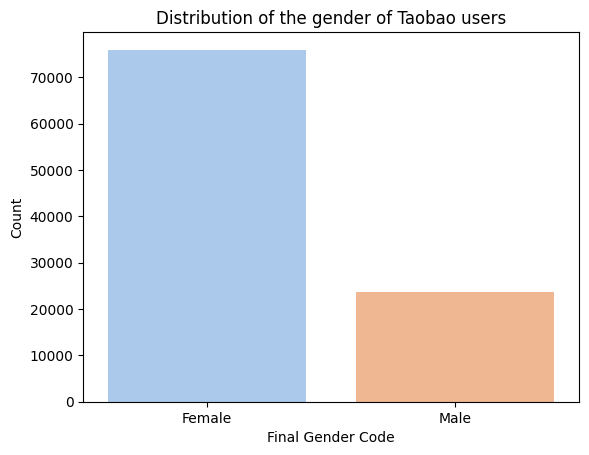

In [61]:
#create countplot
sns.countplot(x='final_gender_code', data=Xtrain, palette='pastel')

#add title and labels 
plt.title('Distribution of the gender of Taobao users', loc='center') 
plt.xlabel('Final Gender Code')
plt.ylabel('Count')

In [62]:
Xtrain['age_level'].value_counts()

age_level
31-35       29615
25-30       23404
36-40       22621
41-45       17435
19-24        4858
Over 46      1614
Under 18       21
Name: count, dtype: int64

Text(0, 0.5, 'Count')

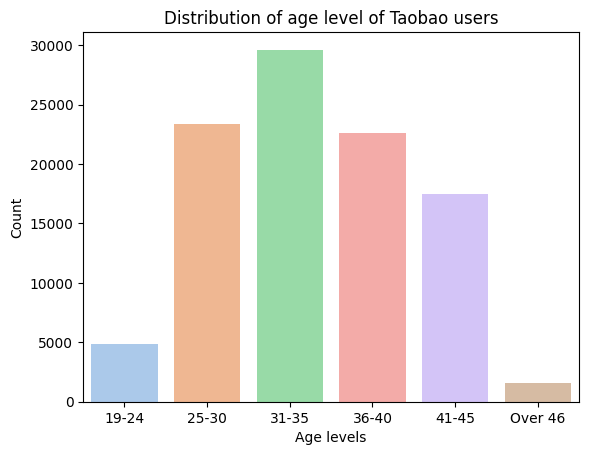

In [63]:
#define the order for the age levels
age_order = ['19-24', '25-30', '31-35', '36-40', '41-45', 'Over 46']

#create countplot
sns.countplot(x='age_level', data=Xtrain, palette='pastel', order=age_order)

#add title and labels 
plt.title('Distribution of age level of Taobao users', loc='center')  
plt.xlabel('Age levels')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

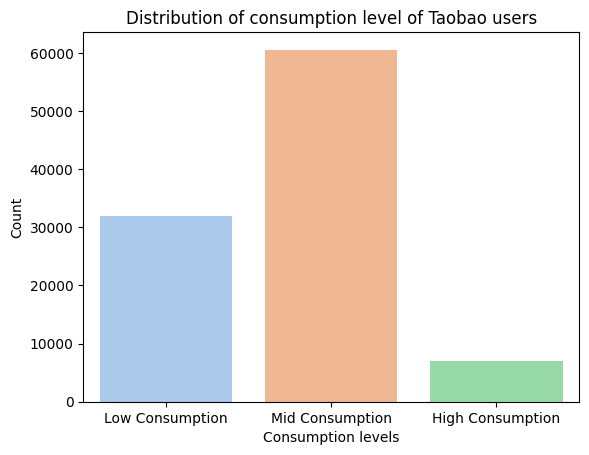

In [64]:
#define the order for the age levels
consumption_order = ['Low Consumption', 'Mid Consumption', 'High Consumption']

#create countplot
sns.countplot(x='pvalue_level', data=Xtrain, palette='pastel', order=consumption_order)

#add title and labels 
plt.title('Distribution of consumption level of Taobao users', loc='center')  
plt.xlabel('Consumption levels')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

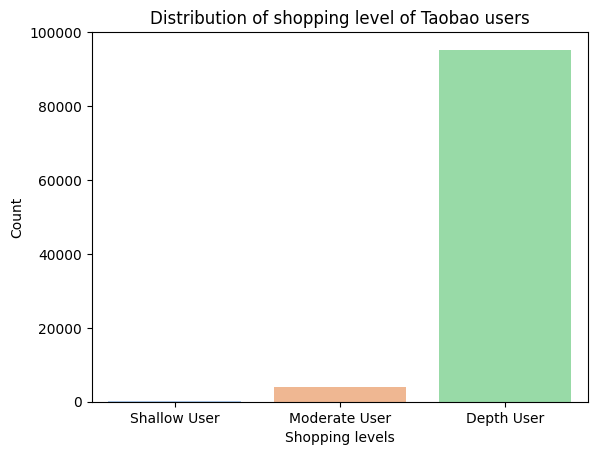

In [65]:
#define the order for the age levels
user_order = ['Shallow User', 'Moderate User', 'Depth User']

#create countplot
sns.countplot(x='shopping_level', data=Xtrain, palette='pastel', order=user_order)

#add title and labels 
plt.title('Distribution of shopping level of Taobao users', loc='center')  
plt.xlabel('Shopping levels')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

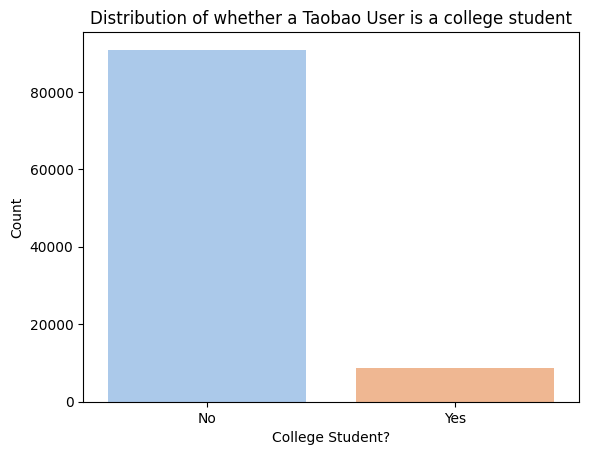

In [66]:
#create countplot
sns.countplot(x='college_student', data=Xtrain, palette='pastel')

#add title and labels 
plt.title('Distribution of whether a Taobao User is a college student', loc='center') 
plt.xlabel('College Student?')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

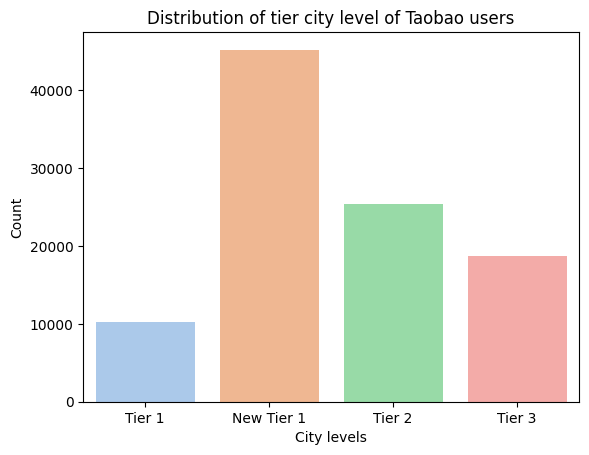

In [67]:
#define the order for the age levels
tier_order = ['Tier 1', 'New Tier 1', 'Tier 2', 'Tier 3']

#create countplot
sns.countplot(x='new_user_class_level', data=Xtrain, palette='pastel', order=tier_order)

#add title and labels 
plt.title('Distribution of tier city level of Taobao users', loc='center')  
plt.xlabel('City levels')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

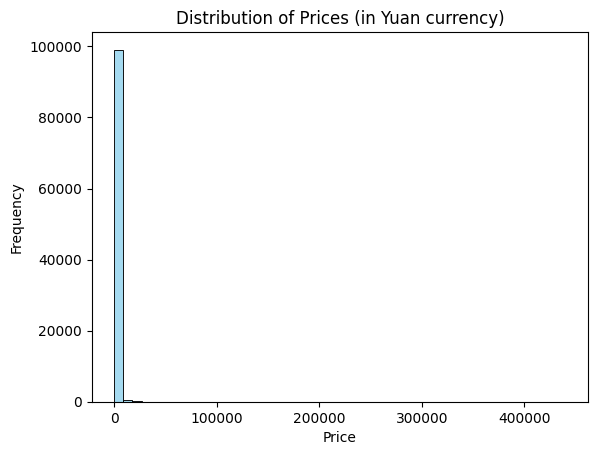

In [68]:
#create a histogram for the 'price' column
sns.histplot(Xtrain['price'], bins=50, kde=False, color='skyblue')

#add title and labels
plt.title('Distribution of Prices (in Yuan currency)', loc='center')  
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Count')

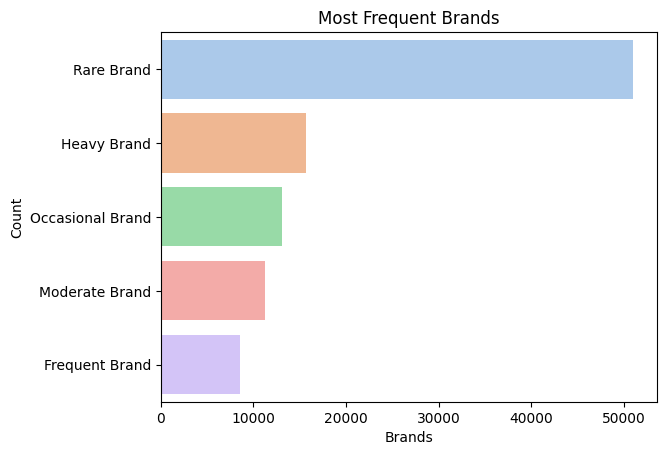

In [76]:
#create countplot
value_brand = Xtrain['brand'].value_counts()
sns.barplot(x=value_brand.values, y= value_brand.index, palette='pastel')

#add title and labels
plt.title('Most Frequent Brands')
plt.xlabel('Brands')
plt.ylabel('Count') 

Text(0, 0.5, 'Count')

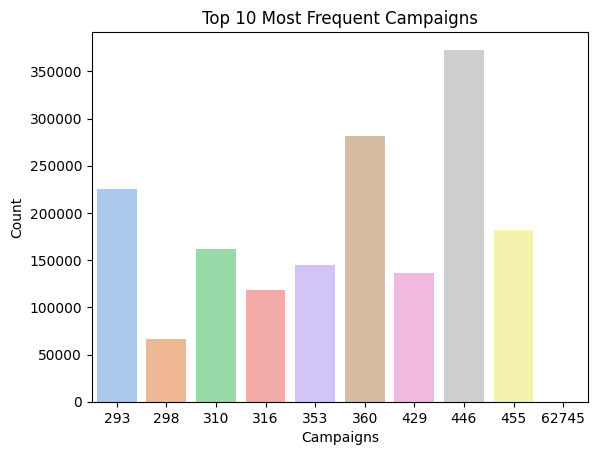

In [697]:
#calculate the frequency of each value
value_counts_campaign_id = Xtrain['campaign_id'].value_counts()

#limit to the top 10 most frequent categories
top_values_campaign_id = value_counts_campaign_id[:10]  

#add title and labels
sns.barplot(x=top_values_campaign_id.values, y=top_values_campaign_id.index, palette='pastel')
plt.title('Top 10 Most Frequent Campaigns')
plt.xlabel('Campaigns')
plt.ylabel('Count') 

Text(0, 0.5, 'Count')

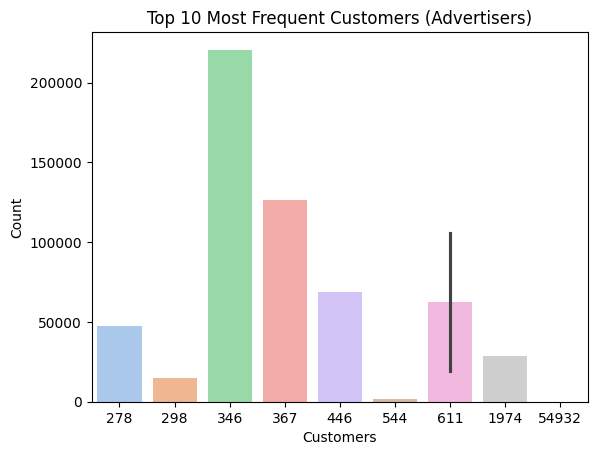

In [698]:
#calculate the frequency of each value
value_counts_customer = Xtrain['customer'].value_counts()

#limit to the top 10 most frequent categories
top_values_customer = value_counts_customer[:10]  

#add title and labels
sns.barplot(x=top_values_customer.values, y=top_values_customer.index, palette='pastel')
plt.title('Top 10 Most Frequent Customers (Advertisers)')
plt.xlabel('Customers')
plt.ylabel('Count') 

### 4.2 Bivariate Visualisation

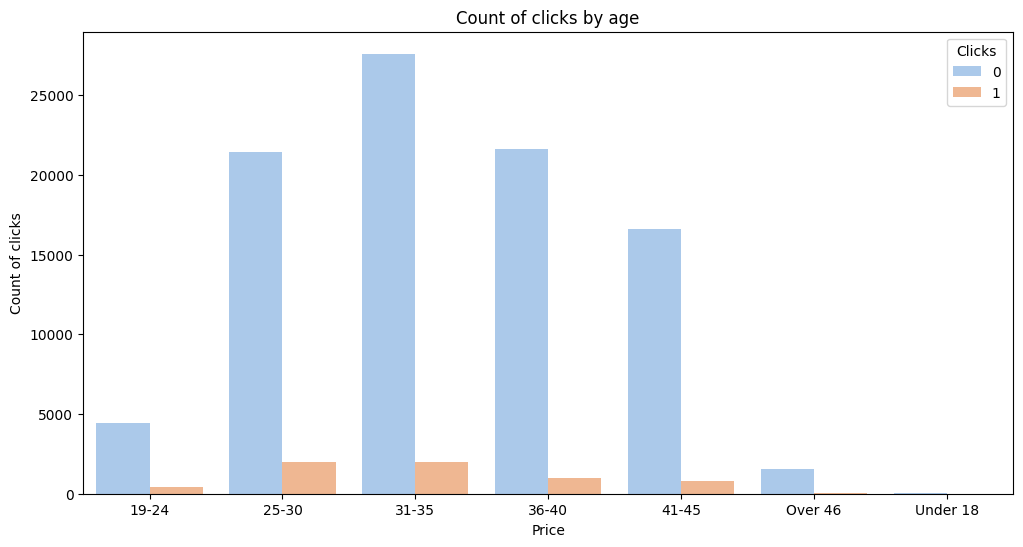

In [77]:
#combine Xtrain and ytrain into a single df for easier visualisation
combined_df = pd.concat([Xtrain, ytrain], axis=1)

#group by 'price' and 'clk' to count the occurrences
grouped_df = combined_df.groupby(['age_level', 'clk']).size().reset_index(name='count')

#plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='age_level', y='count', hue='clk', palette = 'pastel')

#add titles and labels
plt.title('Count of clicks by age')
plt.xlabel('Price')
plt.ylabel('Count of clicks')
plt.legend(title='Clicks')

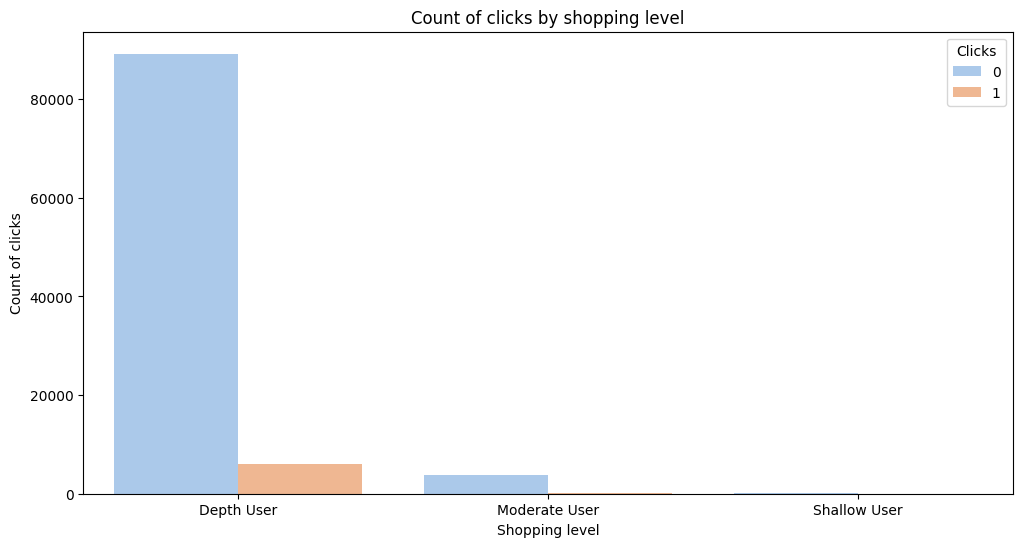

In [78]:
#group by 'price' and 'clk' to count the occurrences
grouped_df = combined_df.groupby(['shopping_level', 'clk']).size().reset_index(name='count')

#plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='shopping_level', y='count', hue='clk', palette = 'pastel')

#add titles and labels
plt.title('Count of clicks by shopping level')
plt.xlabel('Shopping level')
plt.ylabel('Count of clicks')
plt.legend(title='Clicks')

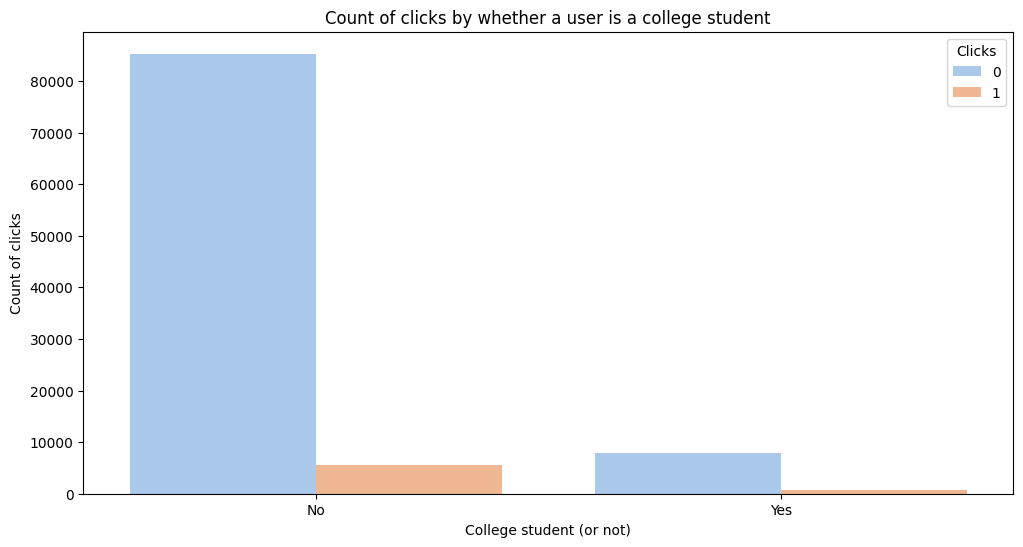

In [79]:
#group by 'price' and 'clk' to count the occurrences
grouped_df = combined_df.groupby(['college_student', 'clk']).size().reset_index(name='count')

#plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='college_student', y='count', hue='clk', palette = 'pastel')

#add titles and labels
plt.title('Count of clicks by whether a user is a college student')
plt.xlabel('College student (or not)')
plt.ylabel('Count of clicks')
plt.legend(title='Clicks')

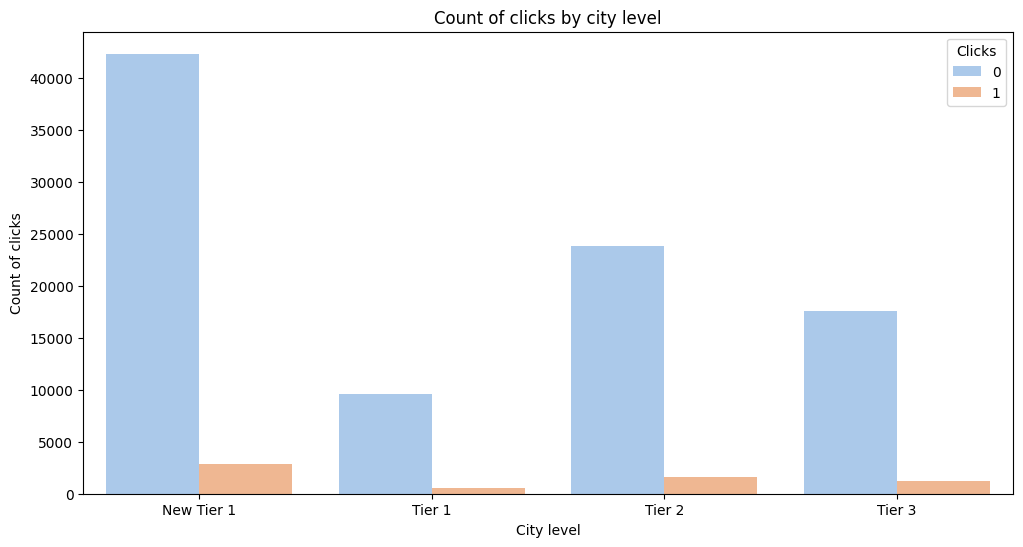

In [80]:
#group by 'price' and 'clk' to count the occurrences
grouped_df = combined_df.groupby(['new_user_class_level', 'clk']).size().reset_index(name='count')

#plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='new_user_class_level', y='count', hue='clk', palette = 'pastel')

#add titles and labels
plt.title('Count of clicks by city level')
plt.xlabel('City level')
plt.ylabel('Count of clicks')
plt.legend(title='Clicks')

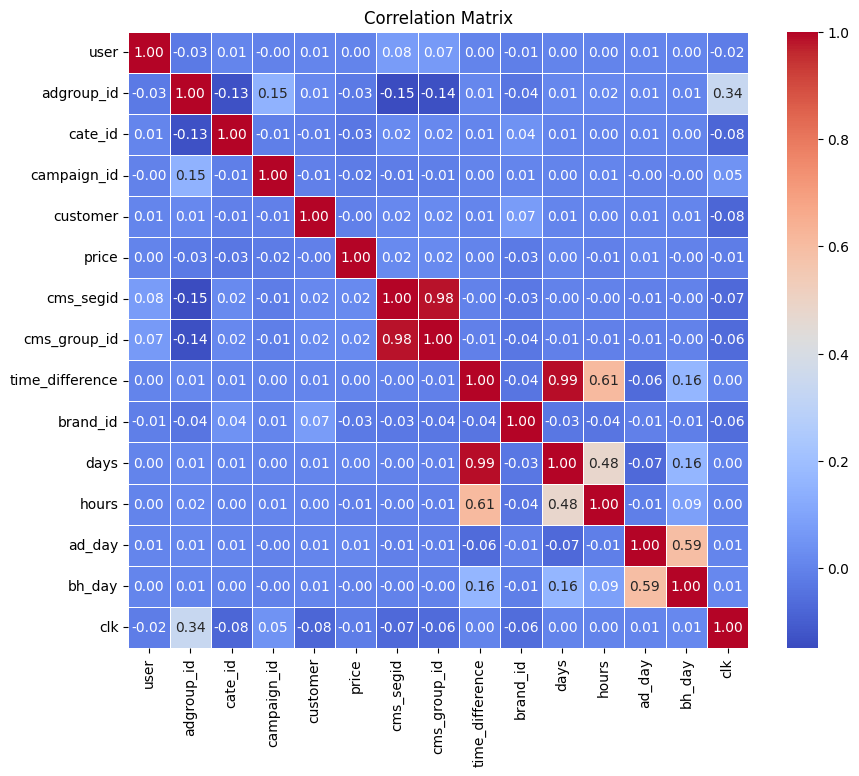

In [81]:
#ensure we only include numerical columns
numerical_df = combined_df.select_dtypes(include='number')

#compute the correlation matrix
correlation_matrix = numerical_df.corr()

#plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Due to the high correlation between cms_segid, cms_group_id, and the slight correlation with adgroup_id, cms_segid can be dropped, as well as time difference with other time indicatives.

In [82]:
Xtrain = Xtrain.drop(columns=["cms_segid", "time_difference"])

Xtest = Xtest.drop(columns=["cms_segid", "time_difference"])

In [83]:
Xtrain.shape

(99568, 26)

In [84]:
Xtest.shape

(13524, 26)

Next step will be feature engineering to modify features and transform them.

# 5. Feature Engineering

### 5.1. Time indicatives

In [85]:
Xtrain.head()

,user,adgroup_id,cate_id,campaign_id,customer,brand,price,cms_group_id,final_gender_code,age_level,...,bh_normal_date,adgroup,category,campaign,brand_id,advertiser,days,hours,ad_day,bh_day
0,358193,102,126,138148,20107,Moderate Brand,98.0,2,Female,25-30,...,2017-05-10 03:39:42+08:00,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,0,10,10
1,358193,102,126,138148,20107,Moderate Brand,98.0,2,Female,25-30,...,2017-05-08 21:58:54+08:00,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,1,5,10,8
2,1002263,102,126,138148,20107,Moderate Brand,98.0,3,Female,31-35,...,2017-05-06 13:31:03+08:00,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,0,6,6
3,1002263,102,126,138148,20107,Moderate Brand,98.0,3,Female,31-35,...,2017-05-06 10:50:14+08:00,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,2,6,6
4,1002263,102,126,138148,20107,Moderate Brand,98.0,3,Female,31-35,...,2017-05-07 11:15:56+08:00,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,21,6,7


#### 5.1.1. Training set

In [86]:
#extract the day of the week and store it in a new column 'day_of_week'
Xtrain['day_of_week'] = Xtrain['bh_normal_date'].dt.day_name()

In [87]:
#extract the hour and categorise into morning, afternoon, evening, night
def categorised_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

#create the 'time_of_day' column
Xtrain['time_of_day'] = Xtrain['bh_normal_date'].dt.hour.apply(categorised_time_of_day)

In [88]:
#specify the conditions for the 'action_taken' column
conditions_Xtrain = [
    Xtrain['ad_normal_date'] > Xtrain['bh_normal_date'],   #action taken before ad
    Xtrain['ad_normal_date'] < Xtrain['bh_normal_date'],   #action taken after ad
    Xtrain['ad_normal_date'] == Xtrain['bh_normal_date']   #action taken on ad date (ad seen)
]

#specify the corresponding results for each condition
choices = ['Before ad', 'After ad', 'On ad']

#create the 'action_taken' column based on the conditions and choices
Xtrain['action_taken'] = np.select(conditions_Xtrain, choices)

In [91]:
Xtrain = Xtrain.drop(['ad_day', 'bh_day', 'ad_normal_date', 'bh_normal_date' ], axis=1)

In [93]:
Xtrain.head()

,user,adgroup_id,cate_id,campaign_id,customer,brand,price,cms_group_id,final_gender_code,age_level,...,adgroup,category,campaign,brand_id,advertiser,days,hours,day_of_week,time_of_day,action_taken
0,358193,102,126,138148,20107,Moderate Brand,98.0,2,Female,25-30,...,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,0,Wednesday,Night,On ad
1,358193,102,126,138148,20107,Moderate Brand,98.0,2,Female,25-30,...,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,1,5,Monday,Night,Before ad
2,1002263,102,126,138148,20107,Moderate Brand,98.0,3,Female,31-35,...,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,0,Saturday,Afternoon,On ad
3,1002263,102,126,138148,20107,Moderate Brand,98.0,3,Female,31-35,...,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,2,Saturday,Morning,Before ad
4,1002263,102,126,138148,20107,Moderate Brand,98.0,3,Female,31-35,...,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,21,Sunday,Morning,After ad


In [94]:
Xtrain_exp.columns

Index(['user', 'adgroup_id', 'cate_id', 'campaign_id', 'customer', 'brand',
       'price', 'cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'college_student',
       'new_user_class_level', 'btag', 'adgroup', 'category', 'campaign',
       'brand_id', 'advertiser', 'days', 'hours', 'bh_day', 'day_of_week',
       'time_of_day', 'action_taken', 'bh_hour', 'bh_min'],
      dtype='object')

#### 5.1.2. Testing set

In [95]:
#extract the day of the week and store it in a new column 'day_of_week'
Xtest['day_of_week'] = Xtest['bh_normal_date'].dt.day_name()

In [96]:
#create the 'time_of_day' column
Xtest['time_of_day'] = Xtest['bh_normal_date'].dt.hour.apply(categorised_time_of_day)

In [97]:
#specify the conditions for the 'action_taken' column
conditions_Xtest = [
    Xtest['ad_normal_date'] > Xtest['bh_normal_date'],   # Action taken before ad
    Xtest['ad_normal_date'] < Xtest['bh_normal_date'],   # Action taken after ad
    Xtest['ad_normal_date'] == Xtest['bh_normal_date']   # Action taken on ad date
]

#specify the corresponding results for each condition
choices = ['Before ad', 'After ad', 'On ad']

#create the 'action_taken' column based on the conditions and choices
Xtest['action_taken'] = np.select(conditions_Xtest, choices)

In [100]:
Xtest = Xtest.drop(['ad_day', 'bh_day', 'ad_normal_date', 'bh_normal_date' ], axis=1)

In [102]:
Xtrain.shape

(99568, 25)

In [103]:
Xtest.shape

(13524, 25)

#### 5.1.3. Visualisations

In [104]:
Xtrain.head()

,user,adgroup_id,cate_id,campaign_id,customer,brand,price,cms_group_id,final_gender_code,age_level,...,adgroup,category,campaign,brand_id,advertiser,days,hours,day_of_week,time_of_day,action_taken
0,358193,102,126,138148,20107,Moderate Brand,98.0,2,Female,25-30,...,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,0,Wednesday,Night,On ad
1,358193,102,126,138148,20107,Moderate Brand,98.0,2,Female,25-30,...,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,1,5,Monday,Night,Before ad
2,1002263,102,126,138148,20107,Moderate Brand,98.0,3,Female,31-35,...,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,0,Saturday,Afternoon,On ad
3,1002263,102,126,138148,20107,Moderate Brand,98.0,3,Female,31-35,...,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,2,Saturday,Morning,Before ad
4,1002263,102,126,138148,20107,Moderate Brand,98.0,3,Female,31-35,...,Moderate Adgroup,Moderate Category,Moderate Campaign,102457,Moderate Advertiser,0,21,Sunday,Morning,After ad


Text(0, 0.5, 'Number of clicks')

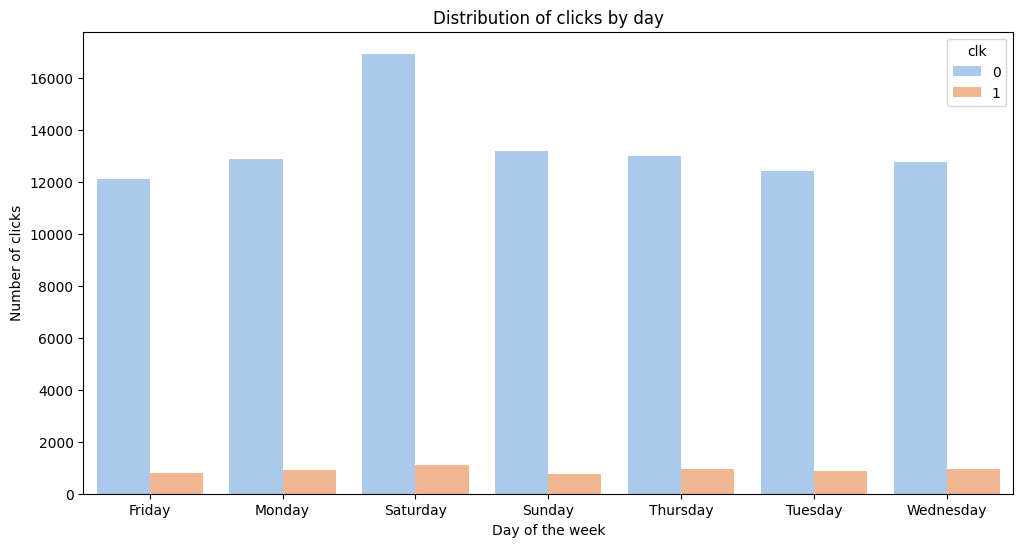

In [105]:
#combine Xtrain and ytrain into a single df for easier visualisation
combined_df = pd.concat([Xtrain, ytrain], axis=1)

#group by 'day_of_week' and 'clk' to count the occurrences
grouped_df = combined_df.groupby(['day_of_week', 'clk']).size().reset_index(name='count')

#plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='day_of_week', y='count', hue='clk', palette='pastel')

#add titles and labels
plt.title('Distribution of clicks by day')
plt.xlabel('Day of the week')
plt.ylabel('Number of clicks')

Text(0, 0.5, 'Number of clicks')

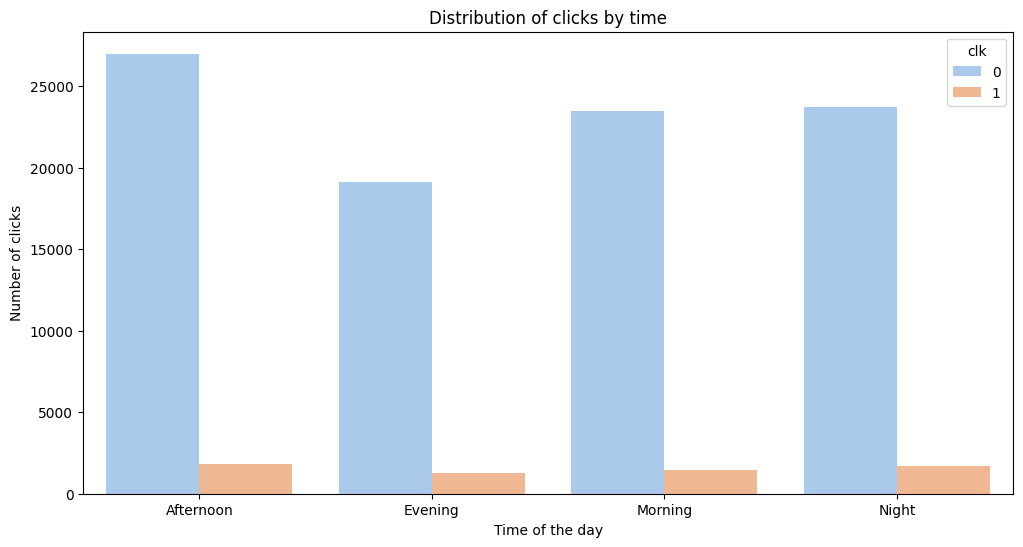

In [106]:
#group by 'time_of_day' and 'clk' to count the occurrences
grouped_df = combined_df.groupby(['time_of_day', 'clk']).size().reset_index(name='count')

#plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='time_of_day', y='count', hue='clk', palette='pastel')

#add titles and labels
plt.title('Distribution of clicks by time')
plt.xlabel('Time of the day')
plt.ylabel('Number of clicks')

Text(0, 0.5, 'Number of clicks')

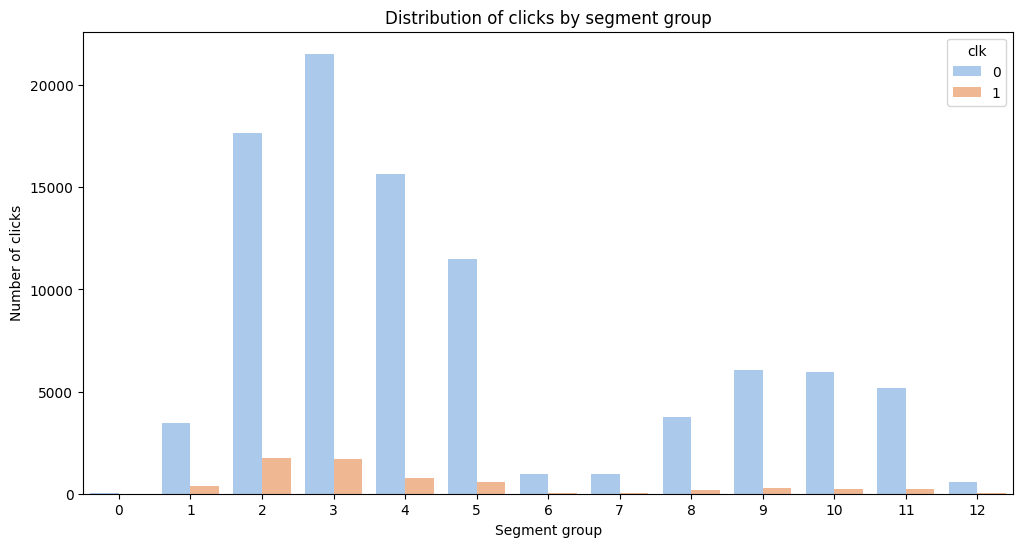

In [107]:
#group by 'group segment' and 'clk' to count the occurrences
grouped_df = combined_df.groupby(['cms_group_id', 'clk']).size().reset_index(name='count')

#plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='cms_group_id', y='count', hue='clk', palette='pastel')

#add titles and labels
plt.title('Distribution of clicks by segment group')
plt.xlabel('Segment group')
plt.ylabel('Number of clicks')

Text(95.72222222222221, 0.5, 'Action taken')

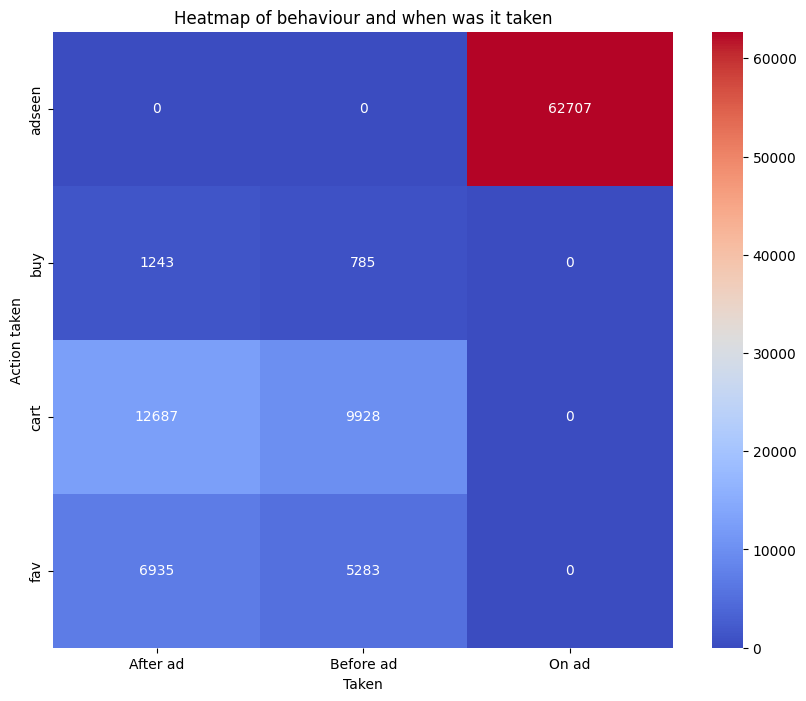

In [108]:
#create a contingency table
contingency_table = pd.crosstab(Xtrain['btag'], Xtrain['action_taken'])

#plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm")

#add titles and labels
plt.title('Heatmap of behaviour and when was it taken')
plt.xlabel('Taken')
plt.ylabel('Action taken')

Text(95.72222222222221, 0.5, 'Action taken')

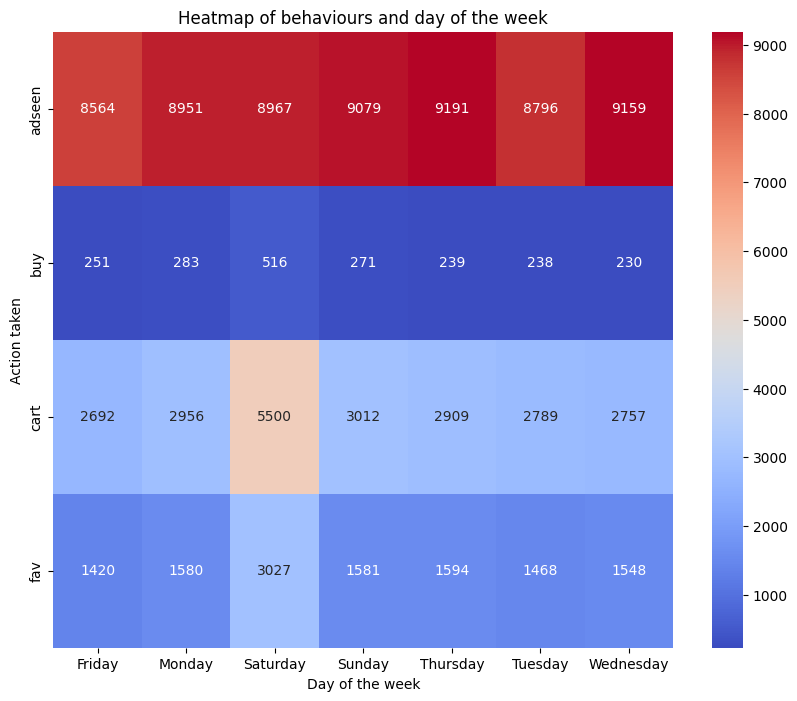

In [109]:
#create a contingency table
contingency_table = pd.crosstab(Xtrain['btag'], Xtrain['day_of_week'])

#plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm")

#add titles and labels
plt.title('Heatmap of behaviours and day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Action taken')

Text(95.72222222222221, 0.5, 'Action taken')

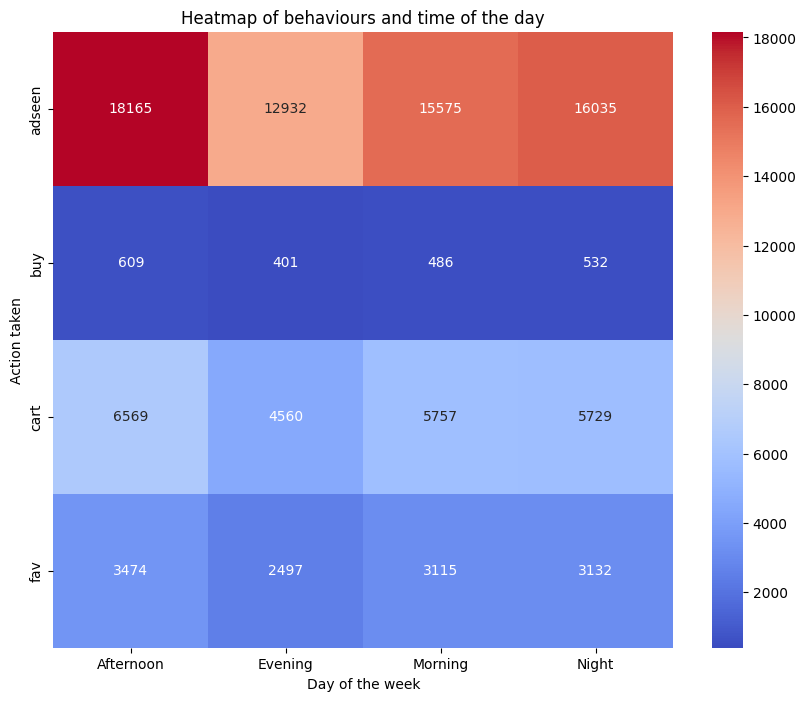

In [110]:
#create a contingency table
contingency_table = pd.crosstab(Xtrain['btag'], Xtrain['time_of_day'])

#plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm")

#customise the plot
plt.title('Heatmap of behaviours and time of the day')
plt.xlabel('Day of the week')
plt.ylabel('Action taken')

### 5.2. Outliers

As price is the only numerical variable, it will be the only category treated for outliers.

In [111]:
class IqrOutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor
        self.lower_limits = None
        self.upper_limits = None
    
    def fit(self, X, y=None):
        Q1 = X.quantile(0.25)
        Q3 = X.quantile(0.75)
        IQR = Q3 - Q1
        self.lower_limits = Q1 - self.factor * IQR
        self.upper_limits = Q3 + self.factor * IQR
        return self
    
    def transform(self, X):
        #remove outliers based on previously calculated limits
        X = X.clip(self.lower_limits, self.upper_limits)
        return X

In [112]:
#set up the outlier remover 
outlier_remover = IqrOutlierRemover(factor=1.5)

#fit and transform the training set
Xtrain['price'] = outlier_remover.fit_transform(Xtrain['price'])

#ensure that ytrain remains aligned with Xtrain indexes 
ytrain = ytrain.loc[Xtrain.index]

In [113]:
#transform the test set using already fitted outlier_remover
Xtest['price'] = outlier_remover.transform(Xtest['price'])

#ensure that ytest remains aligned with Xtrain indexes 
ytest = ytest.loc[Xtest.index]

### 5.3. Encoding

Two versions of the training and testing datasets will be prepared to accommodate the requirements of different modeling approaches: one tailored for deep learning models and another for machine learning models. This distinction arises because deep learning models require different processing due to the type of library used. Therefore, the first version is saved without encoding, as the deep learning library necessitate a different treatment.

In [117]:
Xtrain.columns

Index(['user', 'adgroup_id', 'cate_id', 'campaign_id', 'customer', 'brand',
       'price', 'cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'college_student',
       'new_user_class_level', 'btag', 'adgroup', 'category', 'campaign',
       'brand_id', 'advertiser', 'days', 'hours', 'day_of_week', 'time_of_day',
       'action_taken'],
      dtype='object')

#### 5.3.1. Drop not needed columns

In [118]:
Xtrain = Xtrain.drop(['user', 'adgroup_id', 'cate_id', 'campaign_id', 'customer', 'brand_id'], axis=1)

In [119]:
Xtest = Xtest.drop(['user', 'adgroup_id', 'cate_id', 'campaign_id', 'customer', 'brand_id'], axis=1)

In [120]:
Xtrain.columns

Index(['brand', 'price', 'cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'college_student',
       'new_user_class_level', 'btag', 'adgroup', 'category', 'campaign',
       'advertiser', 'days', 'hours', 'day_of_week', 'time_of_day',
       'action_taken'],
      dtype='object')

In [121]:
Xtrain = Xtrain.reset_index(drop=True)
ytrain = ytrain.reset_index(drop=True)

In [122]:
Xtest = Xtest.reset_index(drop=True)
ytest = ytest.reset_index(drop=True)

#### 5.3.2. Save first version of the datasets

In [744]:
#write Xtrain and ytrain to CSV
Xtrain.to_csv('Xtrain_original.csv', index=False)
ytrain.to_csv('ytrain_original.csv', index=False)

#write Xtest and ytest to CSV
Xtest.to_csv('Xtest_original.csv', index=False)
ytest.to_csv('ytest_original.csv', index=False)

#### 5.3.3. One hot encoder:

In [123]:
#set up the onehotencoder 
encoder = OneHotEncoder(handle_unknown='ignore', drop=None, sparse_output=False)

In [124]:
Xtrain.head()

,brand,price,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,college_student,new_user_class_level,btag,adgroup,category,campaign,advertiser,days,hours,day_of_week,time_of_day,action_taken
0,Moderate Brand,98.0,2,Female,25-30,Mid Consumption,Depth User,No,Tier 1,adseen,Moderate Adgroup,Moderate Category,Moderate Campaign,Moderate Advertiser,0,0,Wednesday,Night,On ad
1,Moderate Brand,98.0,2,Female,25-30,Mid Consumption,Depth User,No,Tier 1,buy,Moderate Adgroup,Moderate Category,Moderate Campaign,Moderate Advertiser,1,5,Monday,Night,Before ad
2,Moderate Brand,98.0,3,Female,31-35,Mid Consumption,Depth User,No,New Tier 1,adseen,Moderate Adgroup,Moderate Category,Moderate Campaign,Moderate Advertiser,0,0,Saturday,Afternoon,On ad
3,Moderate Brand,98.0,3,Female,31-35,Mid Consumption,Depth User,No,New Tier 1,cart,Moderate Adgroup,Moderate Category,Moderate Campaign,Moderate Advertiser,0,2,Saturday,Morning,Before ad
4,Moderate Brand,98.0,3,Female,31-35,Mid Consumption,Depth User,No,New Tier 1,fav,Moderate Adgroup,Moderate Category,Moderate Campaign,Moderate Advertiser,0,21,Sunday,Morning,After ad


In [125]:
Xtrain.columns

Index(['brand', 'price', 'cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'college_student',
       'new_user_class_level', 'btag', 'adgroup', 'category', 'campaign',
       'advertiser', 'days', 'hours', 'day_of_week', 'time_of_day',
       'action_taken'],
      dtype='object')

In [126]:
#specify the categorical variables to be encoded 
cat_cols = ['days', 'hours', 'adgroup', 'advertiser', 'category', 'campaign', 'brand', 'cms_group_id', 'final_gender_code', 'age_level', 
            'pvalue_level', 'shopping_level', 'college_student', 'new_user_class_level', 'btag', 'day_of_week', 'time_of_day', 'action_taken' ]

In [127]:
#fit and transform the columns of the training set
Encoded_Xtrain = encoder.fit_transform(Xtrain[cat_cols])

#get the names of the features for each column encoded 
features_names = encoder.get_feature_names_out(cat_cols)

#convert Encoded_Xtrain to DataFrame
Encoded_Xtrain_df = pd.DataFrame(Encoded_Xtrain, columns=features_names)

#drop the original categorical columns from Xtrain
Xtrain_engineered = Xtrain.drop(cat_cols, axis=1)

#concatenate Xtrain with Encoded_Xtrain_df
Xtrain_engineered = pd.concat([Xtrain_engineered, Encoded_Xtrain_df], axis=1)

#make sure that ytrain is aligned with any indexes changes
ytrain_engineered = ytrain

In [128]:
#Transform the columns of the testing set
Encoded_Xtest = encoder.transform(Xtest[cat_cols])

#get the names of the features for each column encoded 
features_names = encoder.get_feature_names_out(cat_cols)

#convert Encoded_Xtest to DataFrame
Encoded_Xtest_df = pd.DataFrame(Encoded_Xtest, columns=features_names)

#drop the original categorical columns from Xtest
Xtest_engineered = Xtest.drop(cat_cols, axis=1)

#concatenate Xtest with Encoded_Xtest_df
Xtest_engineered = pd.concat([Xtest_engineered, Encoded_Xtest_df], axis=1)

#make sure that ytest is aligned with any indexes changes
ytest_engineered = ytest

In [129]:
Xtrain_engineered.shape

(99568, 110)

In [130]:
ytrain_engineered.shape

(99568,)

In [131]:
Xtest_engineered.shape

(13524, 110)

In [132]:
ytest_engineered.shape

(13524,)

### 5.4. Feature scaling

In [133]:
#initialise the StandardScaler
scaler = StandardScaler()

In [134]:
Xtrain_engineered.head()

,price,days_0,days_1,days_2,days_3,days_4,days_5,days_6,days_7,hours_0,...,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,action_taken_After ad,action_taken_Before ad,action_taken_On ad
0,98.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,98.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,98.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,98.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,98.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [135]:
#use the scaler for Xtrain price column 
Xtrain_engineered['price'] = scaler.fit_transform(Xtrain_engineered[['price']])

In [136]:
#use the scaler for Xtest price column 
Xtest_engineered['price'] = scaler.transform(Xtest_engineered[['price']])

### 5.5. Export files

In [137]:
#write Xtrain and ytrain to CSV
Xtrain_engineered.to_csv('Xtrain_new_exp.csv', index=False)
ytrain_engineered.to_csv('ytrain_new_exp.csv', index=False)

#write Xtest and ytest to CSV
Xtest_engineered.to_csv('Xtest_new_exp.csv', index=False)
ytest_engineered.to_csv('ytest_new_exp.csv', index=False)